In [37]:
###how to handle categorical variables

In [ ]:
###frequent cat imputation

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('house_price.csv')

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
df2 = pd.read_csv('house_price.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice' ])

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [44]:
df2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [50]:
df2.isnull().mean().sort_values()

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [49]:
df2.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [56]:
###computing frequency with every featrure

In [73]:
df2.BsmtQual.value_counts().sort_values(ascending=False)

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

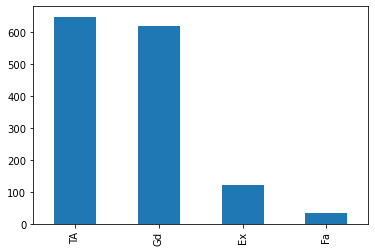

In [74]:
df2.BsmtQual.value_counts().plot.bar()

In [75]:
df2.groupby(['BsmtQual'])['BsmtQual'].count() #another way to get freq

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [76]:
df2.GarageType.value_counts().sort_values(ascending=False)

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [79]:
df2.FireplaceQu.value_counts().sort_values(ascending=False)

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [110]:
def impute_nan(df, variable):
    most_frequent_cat = df[variable].value_counts().sort_values(ascending=False).index[0]
    df[variable+'_most_frequent'] = df[variable].fillna(most_frequent_cat)

In [111]:
for features in df2.columns:
    impute_nan(df2, features)

In [112]:
df2

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_most_frequent,FireplaceQu_most_frequent,GarageType_most_frequent,SalePrice_most_frequent
0,Gd,Gd,Attchd,208500,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000
...,...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500,TA,Gd,Attchd,266500
1458,TA,Gd,Attchd,142125,TA,Gd,Attchd,142125


In [115]:
df2.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice',
       'BsmtQual_most_frequent', 'FireplaceQu_most_frequent',
       'GarageType_most_frequent', 'SalePrice_most_frequent'],
      dtype='object')

In [117]:
df3 = df2.drop(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], axis=1)

In [118]:
df3

,BsmtQual_most_frequent,FireplaceQu_most_frequent,GarageType_most_frequent,SalePrice_most_frequent
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Gd,Attchd,142125


In [120]:
df3.isnull().sum()

BsmtQual_most_frequent       0
FireplaceQu_most_frequent    0
GarageType_most_frequent     0
SalePrice_most_frequent      0
dtype: int64

In [121]:
###this method should not be used whn the number of missinf values are morethn around 20-30%